### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv('../data/usuarios_win_mac_lin.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


<AxesSubplot:xlabel='duracion', ylabel='Count'>

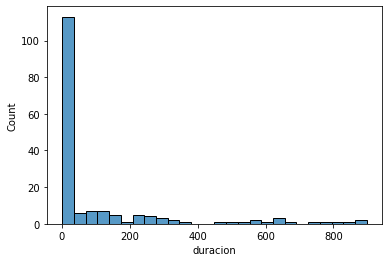

In [5]:
sns.histplot(data=df['duracion'])

<AxesSubplot:>

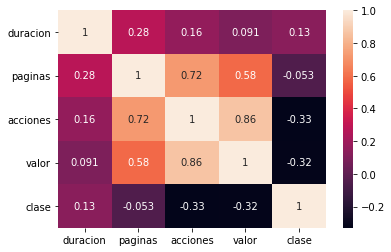

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
model = LinearRegression()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('duracion', axis=1), df['duracion'], test_size=0.2, random_state=1)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.score(X_test, y_test)

-0.08642334594157552

In [11]:
mean_squared_error(y_test, model.predict(X_test))

21027.05539278561

<AxesSubplot:xlabel='duracion', ylabel='Count'>

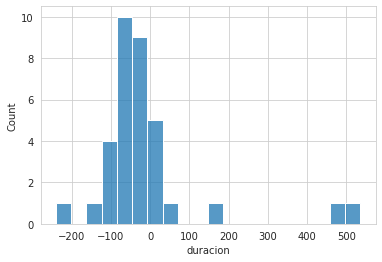

In [12]:
sns.set_style('whitegrid')
sns.histplot(data=y_test - model.predict(X_test), bins=20)

In [13]:
for elemen in zip(df.drop('duracion', axis=1).columns, model.coef_):
    print(f'{elemen[0]} -----> {elemen[1]}')

paginas -----> 31.447182487223557
acciones -----> 2.9583955101131902
valor -----> -0.49927486143073363
clase -----> 29.999919787827626
